# Example 3.4

A modified Proctor test is performed on a soil sample, resulting in the data presented in the table below. Determine: (i) the maximum dry density, (ii) the optimum water content, (iii) the void ratio and saturation at the maximum dry density, and (iv) plot the data with the ZAV and a line passing through the saturation at the optimum water content. Assume $G_s=2.67$

## Data:

$G_s=2.67$

Table

## Principles part (i) and (ii)

We need to plot $\gamma_d$ Vs $w$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Soilved as slv

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the data from csv format

Proctor_data=pd.read_csv('./data/mod3example4.csv') # reads data

Proctor_data #shows table

,gamma pcf,w
0,104.0,14
1,105.5,16
2,106.0,18
3,105.0,20
4,103.5,22
5,101.0,24


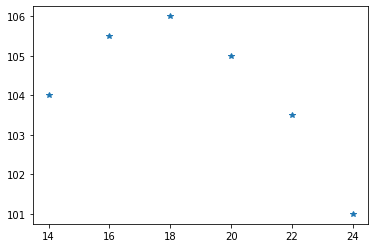

In [3]:
# now we can plot the data to visualize it
plt.plot(Proctor_data['w'], Proctor_data['gamma pcf'], '*')

gamma_dmax= 106.03 pcf
w_opt= 17.62 percent


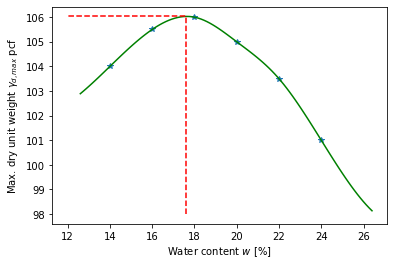

In [4]:
# now I'm going to use my function

gamma_max, w_opt, Gamma, ws=slv.ProcessProctor(Proctor_data['w'], Proctor_data['gamma pcf'], units='pcf') #creates a cubic spline

print('gamma_dmax= %1.2f pcf' %gamma_max)
print('w_opt= %1.2f percent' %w_opt)

#Add details to plot
plt.plot([w_opt, w_opt, 12], [98, gamma_max, gamma_max], '--', color='r') # interpolation line

## Principles part (iii)

$\gamma_{d}=\gamma_w \cfrac{G_s}{1+e}$

$Se=w G_s$





In [5]:
# lets solve e from the first equation

Gs=2.67 # specific gravity

e=(62.4*Gs/gamma_max)-1 # void ratio
print('e= %1.2f' %e)

S=w_opt*Gs/e # saturation in percent
print('S= %1.2f percent' %S)

e= 0.57
S= 82.33 percent


## Principles part (iv)

$\gamma_d=\cfrac{\gamma_w G_s}{1+w G_s/S}$

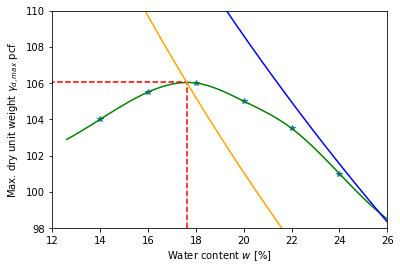

In [9]:
# I'm first defining values of w

w=np.linspace(12, 26, 100) # 100 values from 12 to 26 percent

#Now I can generate the line using my function

ZAV=slv.GetCompactionLines(w,S=100, gamma_w=62.4, Gs=Gs) # ZAV line

l_satmax=slv.GetCompactionLines(w, S=S, gamma_w=62.4, Gs=Gs) # line of equal saturation passing at max density

#run process proctor to recreate the plot

gamma_max, w_opt, _, _=slv.ProcessProctor(Proctor_data['w'], Proctor_data['gamma pcf'], units='pcf') #creates a cubic spline

#Add details to plot
plt.plot([w_opt, w_opt, 12], [98, gamma_max, gamma_max], '--', color='r') # interpolation line
plt.plot(w, ZAV, 'b') #ZAV line
plt.plot(w, l_satmax, 'orange') #line of equal saturation
plt.xlim([12, 26])
plt.ylim([98,110])
plt.savefig('ProctorPlot.svg')

# Example 3.5

The construction of an earth embankment is designed in lifts of 6 inches with the same soil studied in Example 3.4. What are the minimum dry density and the range of water contents that the soil could be compacted with in the field if the relative compaction specified is: (i) 98%, (ii) 95%, (iii) 90%?

## Data:

Table from problem 3.4

$RC=98$%

$RC=95$%

$RC=90$%

## Principles

$RC=\cfrac{\gamma_{d \ \mathrm{field}}}{\gamma_{d,max}} \times 100$

In [7]:
RC=98
gamma_field=RC*gamma_max/100 #minimum density that soil can be compacted in the field
print('min gamma_d= %1.2f pcf at %s percent' %(gamma_field, RC))

min gamma_d= 103.91 pcf at 98 percent


In [8]:
w_range=ws[np.argwhere(np.diff(np.sign(gamma_field-Gamma))).flatten()] #finds intersections on interpolation data
print('Compact with %1.2f <=w<= %1.2f percent' %(w_range[0], w_range[1]))

Compact with 13.85 <=w<= 21.52 percent


In [10]:
# for the other points I created a function
RC=95
gamma_field, w_range=slv.GetSpecifcationsFor(RC,Gamma,ws)# Returns specification values
print('min gamma_d= %1.2f pcf at %s percent' %(gamma_field, RC))
print('Compact with %1.2f <=w<= %1.2f percent' %(w_range, w_range))

min gamma_d= 100.73 pcf at 95 percent
Compact with 24.17 <=w<= 24.17 percent


In [11]:
RC=90
gamma_field=RC*gamma_max/100 #minimum density that soil can be compacted in the field
print('min gamma_d= %1.2f pcf at %s percent' %(gamma_field, RC))

min gamma_d= 95.43 pcf at 90 percent


# Example 3.6

A balloon densimeter test was conducted in the embankment of Example 3.5. The reading on the densimeter indicates that the carved volume is 0.03 ft<sup>3</sup>. The extracted sample weights 3.8 lb wet and 3.1 lb dry. Calculate the following:
<ol>
	<li>The in-situ dry unit weight, water content, saturation, and void ratio</li>
	<li>Would this site pass a QC inspection? </li>
</ol>

## Data:

$V_t=0.03$ ft^3

$W_t=3.8$ lb

$W_s=3.1$ lb

$G_s=2.66$ From example 3.4

$\gamma_{d,max}=106.03$ pcf

## Principles for part 1

$w=\cfrac{W_w}{W_s}\times 100$

$\gamma_t=\gamma_d(1+w/100)$

$\gamma_d=\gamma_s \cfrac{G_s}{1+e}$

$Se=wG_s$

In [12]:
Wt=3.8 # total weight in lb
Ws=3.1 # dry weight in lb

w_field=slv.GetWaterContent(Wt, Ws, 0)#get water content
print('w_field= %1.2f percent' %w_field)

w_field= 22.58 percent


In [13]:
Vt=0.03 # total volume in ft^3
gamma_t=Wt/Vt #total unit weight in pcf
print('gamma_t= %1.2f pcf' %gamma_t)

gamma_t= 126.67 pcf


In [14]:
gamma_dfield=gamma_t/(1+0.01*w_field) #dry unit weight at field
print('gamma_dfield= %1.2f pcf' %gamma_dfield)

gamma_dfield= 103.33 pcf


In [15]:
RC=100*gamma_dfield/gamma_max # relative compaction
print('RC= %1.2f percent' %RC)

RC= 97.46 percent


In [16]:
e=(62.4*2.66/gamma_dfield)-1 #void ratio solved from equation in principles
S=w_field*Gs/e #saturation in percent
print('e= %1.2f' %e)
print('S= %1.1f percent' %S)

e= 0.61
S= 99.4 percent


Soil passes compaction control and was compacted on the wet side to the optimum water content.